In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Sample weekly data
df = pd.read_csv('NVDA_data.csv')
df.head()

,Year,Week_Number,Open,Adj Close,mean_return,volatility,color_label
0,2018,0,48.945000,53.287727,1.98875,3.081352,red
1,2018,1,55.099998,55.162941,0.70180,1.397675,red
2,2018,2,56.012501,56.926830,0.80200,1.813348,green
3,2018,3,57.607498,60.197319,1.13480,1.691356,green
4,2018,4,60.685001,57.770416,-0.80300,2.021694,red


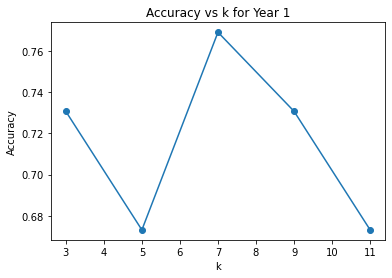

Optimal k value for Year 1: 7


In [2]:
train_data = df[df['Year'] != 2022].copy()
test_data = df[df['Year'] == 2022].copy()

X_train = train_data[['Open', 'Adj Close', 'mean_return', 'volatility']]
y_train = train_data['color_label']

X_test = test_data[['Open', 'Adj Close', 'mean_return', 'volatility']]
y_test = test_data['color_label']

k_values = [3, 5, 7, 9, 11]

accuracy_dict = {}

# Train and evaluate the kNN classifier for each k on Year 1
for k in k_values:
    # Create kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the classifier on the training data
    knn.fit(X_train, y_train)
    
    # Predict labels for the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy and store it in the dictionary
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[k] = accuracy

# Plot the results
plt.plot(k_values, list(accuracy_dict.values()), marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k for Year 1')
plt.show()

# Find the optimal k value
optimal_k = max(accuracy_dict, key=accuracy_dict.get)
print(f'Optimal k value for Year 1: {optimal_k}')

In [3]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# Fit the classifier on the data from Year 1
knn_optimal.fit(X_train, y_train)
y_test_pred = knn_optimal.predict(X_test)
y_test_pred = knn_optimal.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Accuracy for Year 2 using optimal k from Year 1: {test_accuracy}')

conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix for Year 2:')
print(conf_matrix_test)

tn, fp, fn, tp = conf_matrix_test.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'True Positive Rate (Sensitivity): {sensitivity:.4f}')
print(f'True Negative Rate (Specificity): {specificity:.4f}')


Accuracy for Year 2 using optimal k from Year 1: 0.7692307692307693
Confusion Matrix for Year 2:
[[ 9  5]
 [ 7 31]]
True Positive Rate (Sensitivity): 0.8158
True Negative Rate (Specificity): 0.6429


In [4]:
test_data['predicted_label'] = y_test_pred
test_data.head()

,Year,Week_Number,Open,Adj Close,mean_return,volatility,color_label,predicted_label
211,2022,1,298.149994,272.118683,-1.4652,3.573360,red,red
212,2022,2,265.809998,269.072632,-0.1934,2.768013,red,red
213,2022,3,262.600006,233.438583,-3.4885,0.320452,red,red
214,2022,4,223.300003,228.105469,-0.4078,3.646720,red,red
215,2022,5,231.820007,242.876404,1.3404,4.416611,green,red


# Trading strategy for 2022 to calculate the amount at the end of the year using true labels

In [5]:
def stock_investment_strategy(df, initial_balance=100):
    df = df.reset_index(drop=True)  # Reset the index to numeric values
    balance = initial_balance
    position = None
    balance_history = []

    for week in range(len(df)):  # Adjust the loop condition
        open_price = df.loc[week, 'Open']
        close_price = df.loc[week, 'Adj Close']

        if df.loc[week, 'color_label'] == 'green':
            if position is None:
                shares_to_buy = balance / open_price
                print(f"Week {week}: Buying {shares_to_buy:.2f} shares at ${open_price:.2f}")
                position = shares_to_buy
                balance = 0
                print(f"   Shares: {position:.2f}, Portfolio Value: ${balance:.2f}")

        elif df.loc[week, 'color_label'] == 'red':
            if position is not None:
                balance_from_selling = position * df.loc[week - 1, 'Adj Close']
                print(f"Week {week}: Selling {position:.2f} shares at ${df.loc[week - 1, 'Adj Close']:.2f}, "
                      f"Portfolio Value: ${balance_from_selling:.2f}")
                balance += balance_from_selling
                position = None
                print(f"   Portfolio Value: ${balance:.2f}")

        if position is None:
            portfolio_value = balance
        else:
            portfolio_value = position * df.loc[week - 1, 'Adj Close']

        balance_history.append(portfolio_value)
        print(f"Week {week}: Portfolio Value: ${portfolio_value:.2f}")

    return balance_history

resulting_balance_history = stock_investment_strategy(test_data)
print("Balance History based on Modified Predicted Labels for 2022:", resulting_balance_history[-1])


Week 0: Portfolio Value: $100.00
Week 1: Portfolio Value: $100.00
Week 2: Portfolio Value: $100.00
Week 3: Portfolio Value: $100.00
Week 4: Buying 0.43 shares at $231.82
   Shares: 0.43, Portfolio Value: $0.00
Week 4: Portfolio Value: $98.40
Week 5: Selling 0.43 shares at $242.88, Portfolio Value: $104.77
   Portfolio Value: $104.77
Week 5: Portfolio Value: $104.77
Week 6: Portfolio Value: $104.77
Week 7: Buying 0.45 shares at $230.35
   Shares: 0.45, Portfolio Value: $0.00
Week 7: Portfolio Value: $107.39
Week 8: Selling 0.45 shares at $241.26, Portfolio Value: $109.73
   Portfolio Value: $109.73
Week 8: Portfolio Value: $109.73
Week 9: Portfolio Value: $109.73
Week 10: Buying 0.50 shares at $218.69
   Shares: 0.50, Portfolio Value: $0.00
Week 10: Portfolio Value: $110.77
Week 11: Selling 0.50 shares at $264.23, Portfolio Value: $132.58
   Portfolio Value: $132.58
Week 11: Portfolio Value: $132.58
Week 12: Portfolio Value: $132.58
Week 13: Portfolio Value: $132.58
Week 14: Portfolio V

# Trading strategy for 2022 to calculate the amount at the end of the year using predicted labels

In [6]:
def trading_strategy_predicted_logistic_reg(df, initial_balance=100):
    df = df.reset_index(drop=True)  # Reset the index to numeric values
    balance = initial_balance
    position = None
    balance_history = []

    for week in range(len(df)):  # Adjust the loop condition
        open_price = df.loc[week, 'Open']
        close_price = df.loc[week, 'Adj Close']

        if df.loc[week, 'predicted_label'] == 'green':
            if position is None:
                shares_to_buy = balance / open_price
                print(f"Week {week}: Buying {shares_to_buy:.2f} shares at ${open_price:.2f}")
                position = shares_to_buy
                balance = 0
                print(f"   Shares: {position:.2f}, Portfolio Value: ${balance:.2f}")

        elif df.loc[week, 'predicted_label'] == 'red':
            if position is not None:
                balance_from_selling = position * df.loc[week - 1, 'Adj Close']
                print(f"Week {week}: Selling {position:.2f} shares at ${df.loc[week - 1, 'Adj Close']:.2f}, "
                      f"Portfolio Value: ${balance_from_selling:.2f}")
                balance += balance_from_selling
                position = None
                print(f"   Portfolio Value: ${balance:.2f}")

        if position is None:
            portfolio_value = balance
        else:
            portfolio_value = position * df.loc[week - 1, 'Adj Close']

        balance_history.append(portfolio_value)
        print(f"Week {week}: Portfolio Value: ${portfolio_value:.2f}")

    return balance_history

resulting_balance_history_lr = trading_strategy_predicted_logistic_reg(test_data)
print("Balance History based on Modified Predicted Labels for 2022:", resulting_balance_history_lr[-1])


Week 0: Portfolio Value: $100.00
Week 1: Portfolio Value: $100.00
Week 2: Portfolio Value: $100.00
Week 3: Portfolio Value: $100.00
Week 4: Portfolio Value: $100.00
Week 5: Portfolio Value: $100.00
Week 6: Portfolio Value: $100.00
Week 7: Portfolio Value: $100.00
Week 8: Portfolio Value: $100.00
Week 9: Portfolio Value: $100.00
Week 10: Portfolio Value: $100.00
Week 11: Portfolio Value: $100.00
Week 12: Portfolio Value: $100.00
Week 13: Portfolio Value: $100.00
Week 14: Portfolio Value: $100.00
Week 15: Portfolio Value: $100.00
Week 16: Portfolio Value: $100.00
Week 17: Portfolio Value: $100.00
Week 18: Portfolio Value: $100.00
Week 19: Portfolio Value: $100.00
Week 20: Buying 0.61 shares at $162.74
   Shares: 0.61, Portfolio Value: $0.00
Week 20: Portfolio Value: $102.47
Week 21: Selling 0.61 shares at $187.90, Portfolio Value: $115.46
   Portfolio Value: $115.46
Week 21: Portfolio Value: $115.46
Week 22: Portfolio Value: $115.46
Week 23: Portfolio Value: $115.46
Week 24: Buying 0.70 